# Larger Epidemic City Model - Animation

This model is larger, and contains more people and obstacles than the previous version. Obstacles are not randomly placed on the grid, and you can choose how many you want. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class WrappedGrid:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))

    def get(self, x, y): 
        return self.grid[y % self.height][x % self.width]

    def set(self, x, y, value):
        self.grid[y % self.height][x % self.width] = value

class Person:
    def __init__(self, grid, is_sick=False):
        self.grid = grid
        self.x = random.randint(0, grid.width - 1)  # Initial x-coordinate
        self.y = random.randint(0, grid.height - 1)  # Initial y-coordinate
        self.is_sick = is_sick
        self.sickness_duration = 0
        self.sickduration_rate = random.uniform(0.1, 0.3)  # Random immunity rate between 0.1 and 0.3

    def move(self):
        dx = random.randint(-1, 1)  # Move left, right, or stay
        dy = random.randint(-1, 1)  # Move up, down, or stay

        new_x = (self.x + dx) % self.grid.width
        new_y = (self.y + dy) % self.grid.height

        if self.grid.get(new_x, new_y) != 1:
            self.x = new_x
            self.y = new_y
            if self.is_sick:
                self.transmit_sickness(new_x, new_y)
                self.update_sickness_duration()

    def transmit_sickness(self, x, y):
        for person in people:
            if person.x == x and person.y == y and not person.is_sick:
                if random.random() < 0.95:
                    person.is_sick = True

    def update_sickness_duration(self):
        if self.is_sick:
            self.sickness_duration += 1
            if self.sickness_duration >= 25:  # Assuming a sickness duration of 10 time steps
                #self.is_sick = False
                if random.random() < self.sickduration_rate:
                    self.is_sick = False
                    self.sickness_duration = 0
            else:
                self.is_sick

    def get_position(self):
        return self.x, self.y

class Visualizer:
    def __init__(self, grid, people):
        self.grid = grid
        self.people = people
 
    def visualize(self, frame_count):
        plt.figure(figsize=(5, 5))
        plt.imshow(self.grid.grid, cmap='binary', origin='lower')

        for person in self.people:
            if person.is_sick:
                plt.scatter(person.x, person.y, color='red', marker='o', s=20)  # Sick person in red
            else:
                plt.scatter(person.x, person.y, color='blue', marker='o', s=14)  # Healthy person in blue

        plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
        #plt.xlabel('X')
        #plt.ylabel('Y')
        plt.suptitle('Epidemic in City')
        plt.title('Frame {}'.format(frame_count))

        plt.show()
        #plt.savefig('first_plot.png')

# Size of city
width = 50
height = 50
grid = WrappedGrid(width, height)

# Set some obstacles! Random. Change how many obtsacles you want in range()
for k in range(25):
    grid.set(random.randint(0, width), random.randint(0, width), 1)

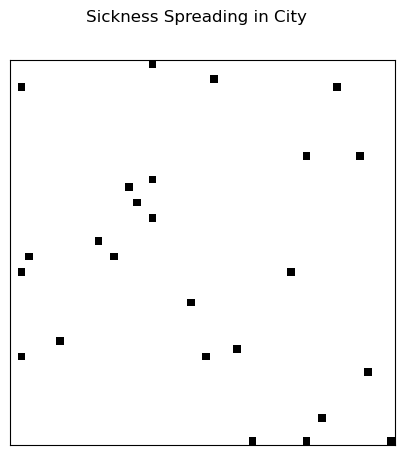

In [2]:
import matplotlib.animation as animation
%matplotlib inline


people = [Person(grid) for _ in range(420)]  # Creating people
people[0].is_sick = True  # Making the first person sick

def update(i):
    # Move the person
    #person.move()
    ax.clear()
    for person in people:
        person.move()
        if person.is_sick:
            ax.imshow(grid.grid, cmap='binary', origin='lower')
            ax.scatter(person.x, person.y, color='red', marker='o', s=20)  # Sick person in red
        else:
            ax.imshow(grid.grid, cmap='binary', origin='lower')
            ax.scatter(person.x, person.y, color='blue', marker='o', s=14)  # Healthy person in blue
        #person_moving = healthy + sick
    ax.set_title('Frame {}'.format(i))
    #return sick, healthy
    
healthys = []
sicks = []
position = []


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)


ani = animation.FuncAnimation(fig, update, frames=80, interval=200, repeat=True, repeat_delay=1500)

ax.imshow(grid.grid, cmap='binary', origin='lower')

ax.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
fig.suptitle('Sickness Spreading in City')

#ax.legend()
plt.show()

ani.save(filename="anim.gif", writer="pillow")
